# Social Media Analytics - Group Project 

###### Group 5: Salma BARKETALLAH, Ndjaidoukmi KEDA, Noémie GAUTIER

Company: Google

 In this notebook, tweets mentionning @google will be analyzed 

In [1]:
options(warnings = -1)

###  Loading the required packages 

In [2]:
# Install rtweet package:
if(!require("rtweet")) install.packages("rtweet", quiet=TRUE); library("rtweet", quiet=TRUE)
# Install Other packages:
for (i in c('topicmodels','ggplot2','readr','SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org", quiet=TRUE)
  require(i, character.only=TRUE, quiet=TRUE)
}
library(tidyverse, quiet=TRUE)


Loading required package: rtweet



Loading required package: topicmodels



Loading required package: ggplot2



Loading required package: readr



Loading required package: SnowballC



Loading required package: slam



Loading required package: tm



Loading required package: NLP




Attaching package: ‘NLP’




The following object is masked from ‘package:ggplot2’:

    annotate




Loading required package: Matrix



Loading required package: tidytext



Loading required package: dplyr




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: hunspell



Loading required package: purrr




Attaching package: ‘purrr’




The following object is masked from ‘package:rtweet’:

    flatten




Loading required package: wordcloud



Loading required package: RColorBrewer



Loading required package: RWeka



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate()  masks ggplot2::annotate()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks rtweet::flatten()
✖ dplyr::lag()     masks stats::lag()
✖ tidyr::pack()    masks Matrix::pack()
✖ tidyr::unpack()  masks Matrix::unpack()



#### Loading the CSV file:

###### Tweets mentioning Google with the @:

In [3]:
google_atweets <- read_csv("google_atweets.csv", col_types = cols())

#### Data pre-processing

In [4]:
# View tweets from Google:
head(google_atweets, n=1)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dttm>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
x366176787,x1222670755596365824,2020-01-29 23:59:58,flyingpotato408,"YOOOOOOO @Google where the fuck my emoji, huh?!?! https://t.co/bBXSEcNFOb https://t.co/XyMcSOFIuz",Twitter for Android,73,NA,NA,NA,⋯,4153,20370,2011-09-01 18:16:38,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/366176787/1538416099,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1100922104021639168/1-g9Vzwu_normal.png


###### Remove Punctuation

In [5]:
#Remove punctiation
google_atweets_text <- mutate(google_atweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

###### Tokenization

In [6]:
google_atweets_tokenized <- google_atweets_text%>% unnest_tokens(output = "word", # how should the new column be named?
                                             input = text, # where can we find the text? 
                                             token = "words", # which tokenization scheme should we follow?
                                             drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower = lowercase
nrow(google_atweets_tokenized)

[1] 30962

###### Remove Unwanted Symbols and Words

In [7]:
#Remove # and @
google_atweets_tokenized <- filter(google_atweets_tokenized , substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@') # This compares for the first letter of a token # omit hashtags
nrow(google_atweets_tokenized)

[1] 30962

###### Remove stopwords

In [8]:
#Remove Stop words:
google_atweets_tokenized<- google_atweets_tokenized %>% anti_join(get_stopwords()) # note that we continue with the 'uncorrected' words here
nrow(google_atweets_tokenized)

# this reduces the number of words by 10,000

Joining, by = "word"



[1] 21179

###### Stemming/Lemmatization

In [9]:
google_atweets_stemming <- google_atweets_tokenized %>% mutate(word = wordStem(word)) 
 
# put a different name as not sure we want to use it

###### Document-term matrix

In [10]:
 # Number of times a word occurred in each tweet
google_atweets_tokenized <- google_atweets_tokenized %>% count(status_id,word)
head(google_atweets_tokenized)

status_id,word,n
<chr>,<chr>,<int>
x1222662023999344641,anyone,1
x1222662023999344641,google,1
x1222662023999344641,httpstcovrgbdkpz,1
x1222662023999344641,meet,1
x1222662023999344641,mentoring,1
x1222662023999344641,mentors,1


###### Inspect the text

In [11]:
# investigate the most frequent terms
atweets_freq <- google_atweets_tokenized %>% group_by(word) %>% # for this, we need to have the sum over all documents
                  summarize(freq = n()) %>%
                  arrange(-freq)                  # arrange = order; from most frequent term to lowest frequent
head(atweets_freq)

word,freq
<chr>,<int>
google,1119
now,116
just,104
please,104
search,103
dont,101


###### Removing https and t.co:

In [12]:
# create a tibble with unwanted words (we took google out as obviously all thee twets contian the word google)
tco <- tibble("word"= c("t.co", "https","google", "heygoogle"))
tco

word
<chr>
t.co
https
google
heygoogle


In [13]:
# remove unwanted words
google_atweets_tokenized <- google_atweets_tokenized %>% anti_join(tco)
head(google_atweets_tokenized)

Joining, by = "word"



status_id,word,n
<chr>,<chr>,<int>
x1222662023999344641,anyone,1
x1222662023999344641,httpstcovrgbdkpz,1
x1222662023999344641,meet,1
x1222662023999344641,mentoring,1
x1222662023999344641,mentors,1
x1222662023999344641,munich,1


In [14]:
# remove unwanted words
atweets_freq <- atweets_freq  %>%anti_join(tco)
head(atweets_freq)

Joining, by = "word"



word,freq
<chr>,<int>
now,116
just,104
please,104
search,103
dont,101
fix,99


###### Making WorldClouds:

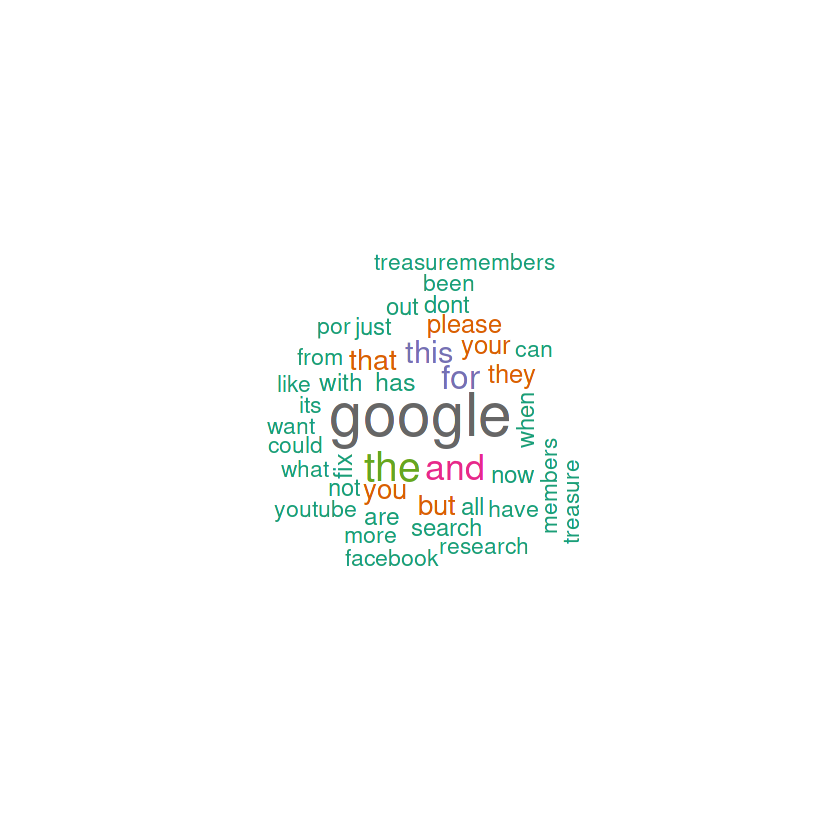

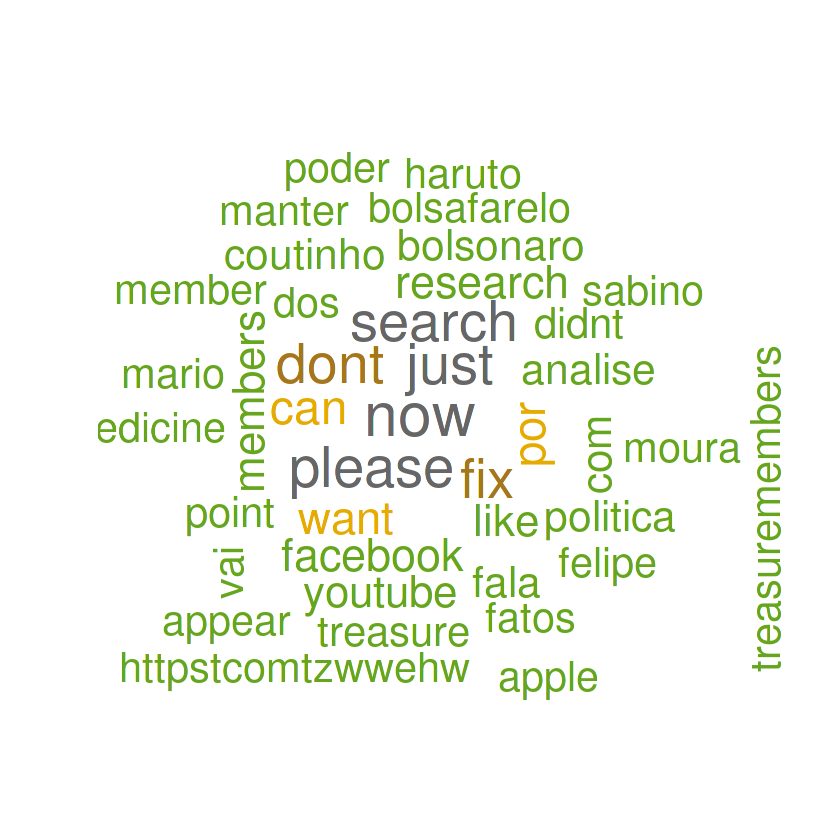

In [15]:
# Word cloud based on the original text with no preprocessing
tf <- termFreq(google_atweets_text$text)
wordcloud(names(tf),tf,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

# Word cloud based on the pre-processing
wordcloud(atweets_freq$word, atweets_freq$freq,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

Selecting by freq



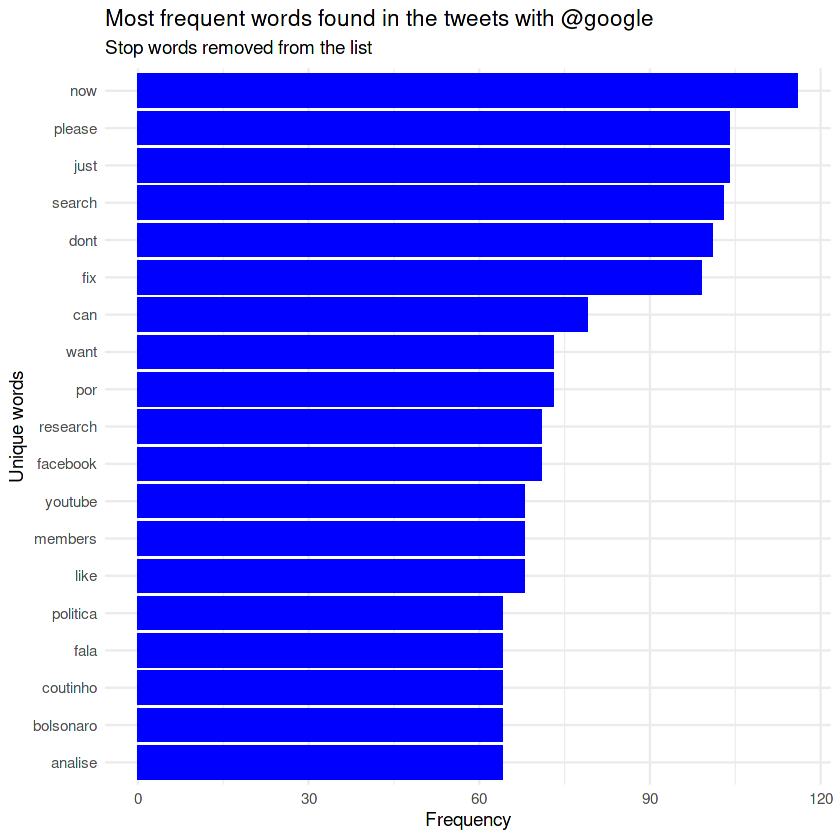

In [16]:
# bar chart of the most frequent words found in the tweets
atweets_freq %>% 
  top_n(15) %>%
  mutate(word = reorder(word, freq)) %>%
  ggplot(aes(x = word, y = freq)) +
  geom_col(fill="blue") +
  xlab(NULL) +
  coord_flip() +
  theme_minimal() +
  labs(y = "Frequency",
       x = "Unique words",
       title = "Most frequent words found in the tweets with @google",
       subtitle = "Stop words removed from the list")

In [17]:
# Creating the Document Term Matrix with integrated tfidf 
atweets_DTM <- google_atweets_tokenized %>%
               count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word,
                value = n, weighting = tm::weightTf)

In [18]:
# let's inspect this matrix's structure
str(atweets_DTM)

List of 6
 $ i       : int [1:18952] 1 208 304 308 360 392 829 977 1 1 ...
 $ j       : int [1:18952] 1 1 1 1 1 1 1 1 2 3 ...
 $ v       : num [1:18952] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 1200
 $ ncol    : int 6547
 $ dimnames:List of 2
  ..$ Docs : chr [1:1200] "x1222662023999344641" "x1222662044031184896" "x1222662063811710976" "x1222662094669172737" ...
  ..$ Terms: chr [1:6547] "anyone" "httpstcovrgbdkpz" "meet" "mentoring" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [19]:
#associations/correlations between words (this is with the dtm):
findAssocs(atweets_DTM , terms = "google", corlimit = 0.10)

$google
numeric(0)

### Summary of Tweets mentioning Google

In [20]:
# Remove retweets
atweets_google_organic  <- google_atweets[google_atweets$is_retweet==FALSE, ]

In [21]:
# Remove replies
atweets_google_organic <- subset(atweets_google_organic, is.na(atweets_google_organic$reply_to_status_id))
nrow(atweets_google_organic)

[1] 256

###### Engagement of tweets 

In [22]:
# average number of likes per tweet
averagelikes<-as.integer(mean(atweets_google_organic$favorite_count))
averagelikes

[1] 1

In [23]:
# average number of retweet per tweet 
averageretweets<-as.integer(mean(atweets_google_organic$retweet_count))
averageretweets

[1] 0

In [24]:
#tweets with highest favourite/like count
atweets_google_organic<- atweets_google_organic %>% arrange(desc(favorite_count))
atweets_google_organic[1,1:5]
atweets_google_organic[1,'favorite_count']

user_id,status_id,created_at,screen_name,text
<chr>,<chr>,<dttm>,<chr>,<chr>
x1100917635334586368,x1277743579348123648,2020-06-29 23:19:43,CHIPSAlliance,"Don’t miss out on @mithro’s talk tomorrow, June 30 at 4 p.m. GMT (9 a.m. PT)! Tim will be talking about an exciting joint project from CHIPS Alliance member company @Google, along with SkyWater, to provide a fully open source Process Design Kit. https://t.co/zKAZ48OP8S https://t.co/acfhNizh0j"


favorite_count
<dbl>
55


In [25]:
#tweets with highest retweets count
atweets_google_organic <- atweets_google_organic%>% arrange(desc(retweet_count))
atweets_google_organic[1,1:5]
atweets_google_organic[1,'retweet_count']

user_id,status_id,created_at,screen_name,text
<chr>,<chr>,<dttm>,<chr>,<chr>
x1100917635334586368,x1277743579348123648,2020-06-29 23:19:43,CHIPSAlliance,"Don’t miss out on @mithro’s talk tomorrow, June 30 at 4 p.m. GMT (9 a.m. PT)! Tim will be talking about an exciting joint project from CHIPS Alliance member company @Google, along with SkyWater, to provide a fully open source Process Design Kit. https://t.co/zKAZ48OP8S https://t.co/acfhNizh0j"


retweet_count
<dbl>
23


###### Types of Tweets

In [26]:
# Keeping only the retweets
atweets_google_retweets <- google_atweets[google_atweets$is_retweet==TRUE,]
nrow(atweets_google_retweets)

[1] 506

In [27]:
# Keeping only the replies
atweets_google_retweets <- subset(google_atweets, !is.na(google_atweets$reply_to_status_id))
nrow(atweets_google_retweets)

[1] 438

In [28]:
# Creating a data frame base on the observations count for retweets, replies and organic tweets
data_google4 <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(256, 506, 438)
)

data_google4

category,count
<chr>,<dbl>
Organic,256
Retweets,506
Replies,438


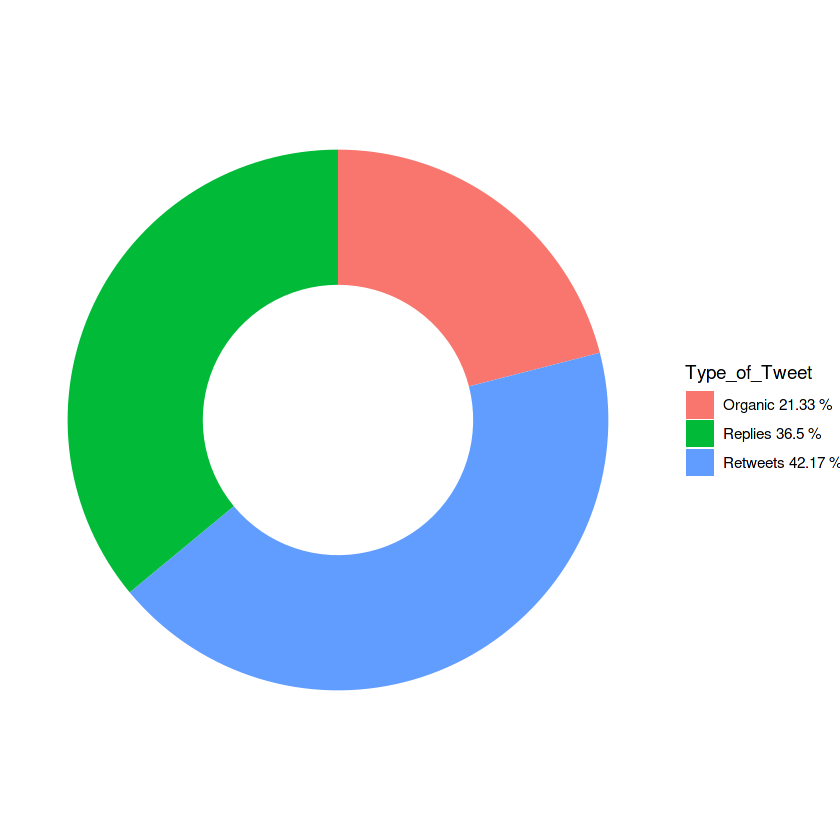

In [29]:
# Adding columns
data_google4$fraction = data_google4$count / sum(data_google4$count)
data_google4$percentage = data_google4$count / sum(data_google4$count) * 100
data_google4$ymax = cumsum(data_google4$fraction)
data_google4$ymin = c(0, head(data_google4$ymax, n=-1))
# Rounding the data to two decimal points
data_google4[,-1] <- round(data_google4[,-1], 2)
# Specify what the legend should say
Type_of_Tweet <- paste(data_google4$category, data_google4$percentage, "%")
ggplot(data_google4, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Type_of_Tweet)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

###### Source of Tweets

In [30]:
#Group tweets per source to check from which source tweets are publish
google_app4 <- google_atweets %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())%>%
  top_n(10)
head(google_app4)

Selecting by count



source,count
<chr>,<int>
Buffer,6
EBhopal Co,2
Hootsuite Inc.,5
hubofml,2
HubSpot,2
Mobile Web (M2),2


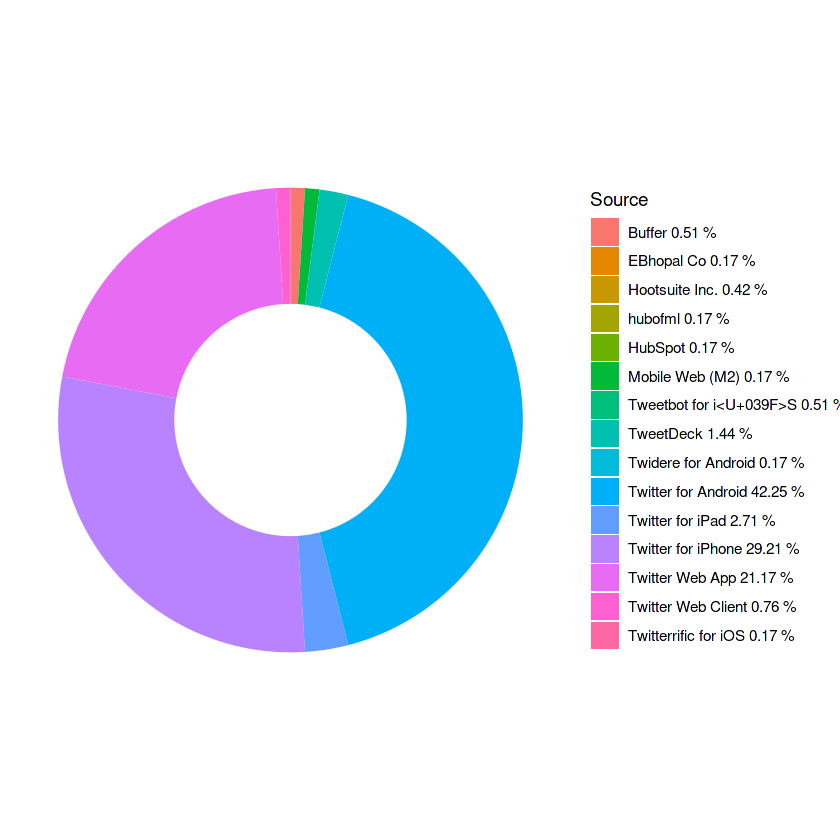

In [31]:
#Create data frame of source count per type
data_google_app4 <- data.frame(
  category=google_app4$source,
  count=google_app4$count
)

#Create statical value and plot the data
data_google_app4$fraction = data_google_app4$count / sum(data_google_app4$count)
data_google_app4$percentage = data_google_app4$count / sum(data_google_app4$count) * 100
data_google_app4$ymax = cumsum(data_google_app4$fraction)
data_google_app4$ymin = c(0, head(data_google_app4$ymax, n=-1))
data_google_app4[,-1] <- round(data_google_app4[,-1], 2)
Source <- paste(data_google_app4$category, data_google_app4$percentage, "%")
ggplot(data_google_app4, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

### Sentiment analysis Of Tweets mentioning Google:

In [32]:

google_atweetsSentiment <- inner_join(google_atweets_tokenized,get_sentiments("bing"))

head(google_atweetsSentiment)
nrow(google_atweetsSentiment)

Joining, by = "word"



status_id,word,n,sentiment
<chr>,<chr>,<int>,<chr>
x1222662094669172737,nice,1,positive
x1222662459443597313,recommendations,1,positive
x1222662459443597313,weird,1,negative
x1222662503815139329,helped,1,positive
x1222662575944540160,fall,1,negative
x1222662575944540160,like,1,positive


[1] 1430

In [33]:
#Get the most negative and positive words

google_atweets_Sentiment_summary <- google_atweetsSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(google_atweets_Sentiment_summary)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,cloud,negative,8
2,hard,negative,8
3,issue,negative,8
4,problem,negative,8
5,shit,negative,9
6,infuriating,negative,10


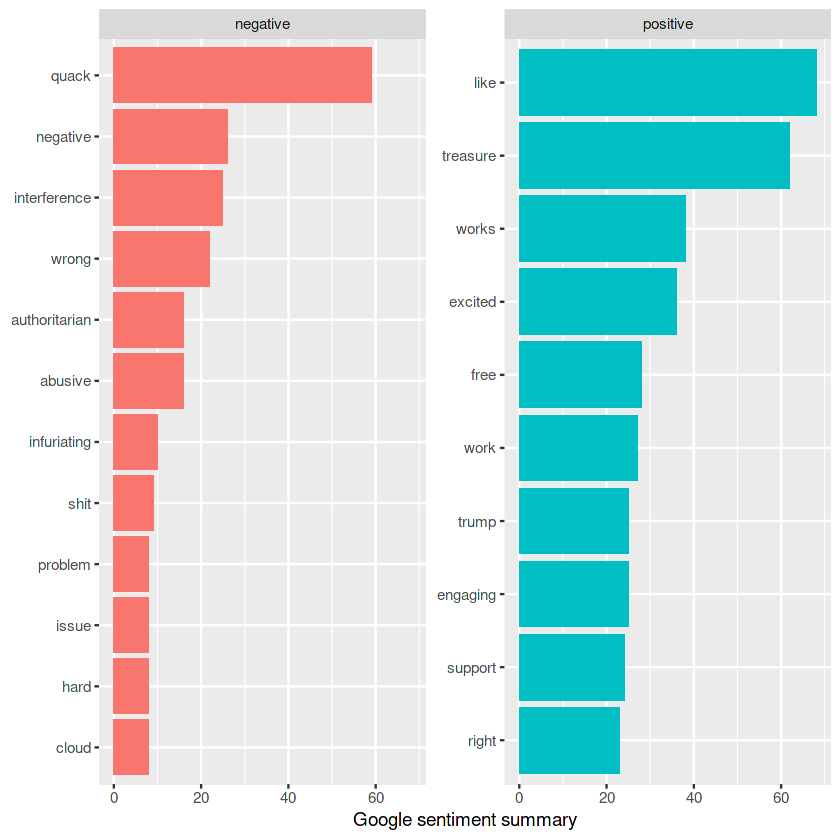

In [34]:
google_atweets_Sentiment_summary %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Google sentiment summary",
       x = NULL) +
  coord_flip()

###  Content Analysis:

In [35]:
# create topic model:
google_atweets_lda <- LDA(atweets_DTM, k = 6,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )

In [36]:
# look at model structure:
str(google_atweets_lda)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:18952] 2 5 5 1 5 4 2 3 2 2 ...
  ..@ alpha          : num 8.33
  ..@ call           : language LDA(x = atweets_DTM, k = 6, method = "gibbs", control = list(nstart = 5,      burnin = 2000, best = TRUE, seed = 2:6))
  ..@ Dim            : int [1:2] 1200 6547
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 4000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 2000
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 8.33
  .. .. ..@ seed         : int [1:5] 2 3 4 5 6
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "/tmp/Rtmp0OuWpy/file4988123329c"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 5
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep         : int 0
  .. .. ..@ estimate.beta: log

In [37]:
# terms per topic
atweets_about_google_topics <- tidy(google_atweets_lda, matrix = "beta")
head(atweets_about_google_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,anyone,2.505198e-05
2,anyone,2.212087e-03
3,anyone,2.778781e-05
4,anyone,2.542782e-05
5,anyone,2.640822e-05
6,anyone,2.558395e-05


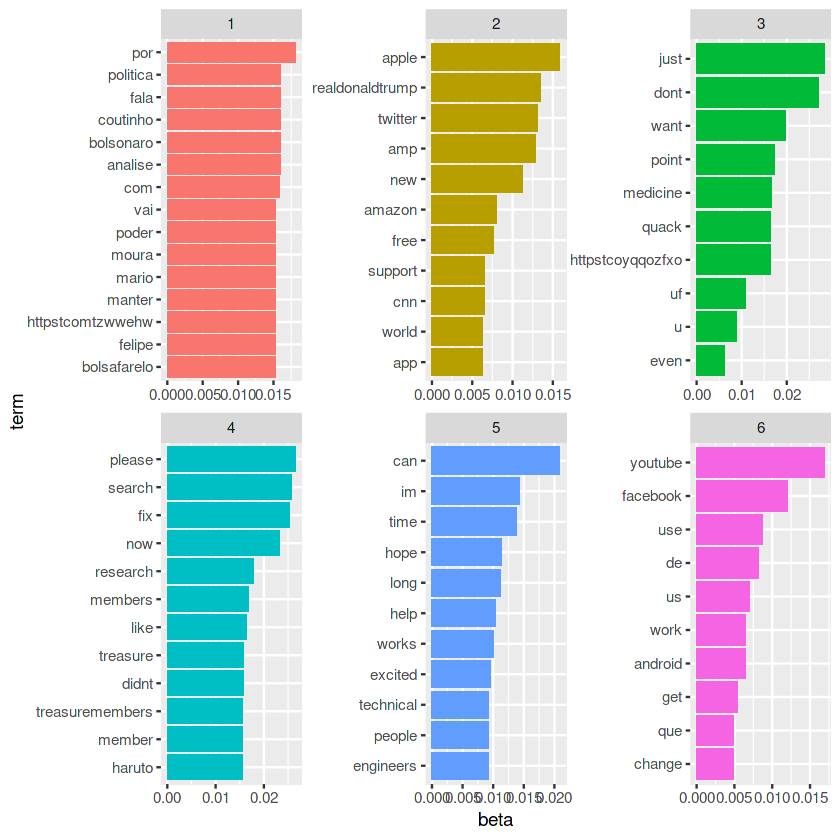

In [38]:
# visualize this

# you can use the following code to get the top terms per topic
google_top_atweet_terms <- atweets_about_google_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)


google_top_atweet_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

In [39]:
google_atweet_documents <- tidy(google_atweets_lda, matrix = "gamma")
# Choose, per tweet, the most important topic (the one with the highest weight)
google_atweet_doc_topic <- google_atweet_documents %>%
  group_by(document) %>%
  arrange(desc(gamma)) %>%
  slice(1) 

google_atweet_doc_topic %>%
  group_by(topic) %>% 
  summarise(nbr_documents = n())

,topic,nbr_documents
,<int>,<int>
1,1,215
2,2,272
3,3,231
4,4,168
5,5,168
6,6,146
